<h1 align='center'> 영상처리 프로그래밍 실습 2</h1>

<h6 align='right'> 2025. 3. 20.</h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:  이선재 &nbsp;&nbsp;          학번: 20227123   &nbsp;&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 3월 19일 (화) 오후 10:00까지 최종본 SmartLEAD제출



---

## 3주차 정리

### 1. Python으로 2, 8, 16진수 표현
- **요약**: Python에서 숫자를 2진수(`0b`), 8진수(`0o`), 16진수(`0x`)로 표현하며, `bin()`, `oct()`, `hex()` 함수로 변환 가능.
- **자세한 설명**: 
  - **표현 방식**: Python은 접두어를 사용해 진수를 구분한다. 예를 들어, `0b1010`는 2진수로 10, `0o12`는 8진수로 10, `0x1A`는 16진수로 26을 의미한다.
  - **함수 활용**: 10진수를 다른 진수로 변환하려면 `bin(10)` → `'0b1010'`, `oct(10)` → `'0o12'`, `hex(10)` → `'0xa'`를 사용한다. 반환값은 문자열이므로 정수로 사용하려면 접두어를 제거하거나 `int('1010', 2)`처럼 변환해야 한다.
  - **예제**: 
    ```python
    num = 10
    print(bin(num))  # '0b1010'
    print(oct(num))  # '0o12'
    print(hex(num))  # '0xa'
    print(int('1010', 2))  # 10 (2진수 → 10진수)
    ```
  - **활용**: 컴퓨터 과학에서 메모리 주소(16진수), 비트 연산(2진수), 파일 권한(8진수) 등을 다룰 때 유용하다.

### 2. Signed와 Unsigned Binary의 차이
- **요약**: Unsigned는 8비트로 0~255, Signed는 -128~127을 표현. Signed에서는 최상위 비트(MSB)가 부호를 결정하며, `1000 0000`은 -128이다.
- **자세한 설명**: 
  - **Unsigned**: 모든 비트를 양수 값으로 사용. 8비트 기준 범위는 `0000 0000`(0) ~ `1111 1111`(255).
  - **Signed**: 2의 보수법 사용. MSB가 1이면 음수. 예: `1000 0000` = -128, `1111 1111` = -1, `0111 1111` = 127.
  - **오버플로우**: 
    - Unsigned: `1111 1111`(255) + 1 = `1 0000 0000` → 8비트로 `0000 0000`(0).
    - Unsigned: `0000 0000`(0) - 1 = `1111 1111`(255).
    - Signed에서는 다르게 계산: `1111 1111`(-1) + 1 = `0000 0000`(0).
  - **예제**: 
    ```python
    # 8비트 unsigned
    print(255 + 1)  # 256, 하지만 8비트로는 0
    # 8비트 signed
    print(-128 & 0xFF)  # 비트 연산으로 -128 표현
    ```
  - **활용**: Signed는 음수를 다룰 때, Unsigned는 메모리 효율을 극대화할 때 사용.

### 3. Broadcasting 연산
- **요약**: Numpy에서 `+`, `-`, `*`, `**`, `/`, `%`, `>`, `<` 등 연산이 배열 크기를 자동으로 맞춰 수행(Broadcasting).
- **자세한 설명**: 
  - **개념**: 배열 크기가 다를 때 작은 배열을 큰 배열에 맞춰 확장. 예: 스칼라(1개 값)와 배열 간 연산.
  - **규칙**: 차원이 맞지 않으면 1을 추가하거나 반복. 예: `(3,)` + `(3,2)` → `(1,3)`이 `(3,2)`로 확장.
  - **예제**: 
    ```python
    import numpy as np
    a = np.array([1, 2, 3])
    print(a + 5)  # [6, 7, 8]
    b = np.array([[1, 2], [3, 4]])
    print(b * 2)  # [[2, 4], [6, 8]]
    print(a > 2)  # [False, False, True]
    ```
  - **활용**: 대규모 데이터 연산에서 반복문 없이 빠르게 처리 가능.

### 4. Clip 함수와 대체 방법
- **요약**: `np.clip(a, min, max)`로 값 범위를 제한. 대안으로 조건식 `a[a > max] = max`, `a[a < min] = min` 사용 가능.
- **자세한 설명**: 
  - **Clip 함수**: 배열의 값을 지정된 최소값과 최대값 사이로 제한.
    ```python
    import numpy as np
    a = np.arange(0, 10, dtype=np.float32)
    print(a.clip(4, 8))  # [4. 4. 4. 4. 4. 5. 6. 7. 8. 8.]
    ```
  - **대체 방법**: 조건 인덱싱으로 동일 효과 구현.
    ```python
    a = np.arange(0, 10, dtype=np.float32)
    a[a > 8] = 8
    a[a < 4] = 4
    print(a)  # [4. 4. 4. 4. 4. 5. 6. 7. 8. 8.]
    ```
  - **차이점**: `clip`은 한 줄로 간결, 조건식은 세밀한 제어 가능.
  - **활용**: 이미지 처리에서 픽셀 값(0~255) 제한 등에 사용.

### 5. PNG와 JPEG의 차이
- **요약**: JPEG는 손실 압축으로 파일 작고 사진에 적합, PNG는 비손실 압축으로 투명도 지원하며 그래픽에 유리.
- **자세한 설명**: 
  - **JPEG**: 
    - 손실 압축(Lossy): 데이터 일부 손실로 품질 저하 가능.
    - 최대 1600만 색상(24비트).
    - 용도: 사진, 웹 업로드(작은 파일 크기).
    - 단점: 투명도 미지원, 반복 저장 시 품질 저하.
  - **PNG**: 
    - 비손실 압축(Lossless): 품질 유지.
    - 투명도(알파 채널) 지원.
    - 용도: 로고, 차트, 일러스트(고품질 필요 시).
    - 단점: 파일 크기 큼.
  - **비교 표**:
    | 항목         | JPEG             | PNG              |
    |--------------|------------------|------------------|
    | 압축         | 손실             | 비손실           |
    | 파일 크기    | 작음             | 큼               |
    | 투명도       | 미지원           | 지원             |
    | 용도         | 사진             | 그래픽           |
  - **활용**: JPEG는 빠른 로딩 필요 시, PNG는 투명 배경이나 선명함 요구 시 선택.

### 6. 영상 속성 구하기
- **요약**: `cv2.imread()`로 이미지 읽고, `shape`로 (높이, 너비, 채널 수), `dtype`로 비트 수 확인.
- **자세한 설명**: 
  - **코드**:
    ```python
    import cv2
    image = cv2.imread("bird.png")
    height, width, channels = image.shape
    print(f"가로, 세로: {width}, {height}")
    print(f"채널 수: {channels}")
    print(f"비트 수: {image.dtype}")
    ```
  - **결과 해석**: 
    - `width`, `height`: 픽셀 단위 크기.
    - `channels`: RGB면 3, 투명도 포함 시 4.
    - `dtype`: `uint8` = 8비트(0~255).
  - **활용**: 이미지 처리 전 기본 정보 확인.

### 7. 콘솔에 영상 표시
- **요약**: OpenCV(BGR) 이미지를 Matplotlib(RGB)로 표시하려면 `img[:,:,::-1]`로 변환. 대안은 `mpl.imread()`.
- **자세한 설명**: 
  - **문제**: OpenCV는 BGR, Matplotlib는 RGB → 색상 왜곡.
  - **해결**:
    ```python
    import cv2
    import matplotlib.pyplot as plt
    img = cv2.imread("bird.png")
    plt.imshow(img[:,:,::-1])  # BGR → RGB
    plt.show()
    ```
  - **대안**:
    ```python
    import matplotlib.image as mpl
    img = mpl.imread("bird.png")  # RGB로 직접 읽기
    plt.imshow(img)
    plt.show()
    ```
  - **배경**: Intel의 RGB 특허 회피로 OpenCV가 BGR 채택.
  - **활용**: 이미지 시각화 시 색상 문제 해결.

### 8. 두 파일 콘솔에 표시
- **요약**: `plt.subplot()`으로 두 이미지 나란히 표시, `axis('off')`로 축 제거.
- **자세한 설명**: 
  - **코드**:
    ```python
    import matplotlib.pyplot as plt
    import matplotlib.image as mpl
    tree1 = mpl.imread('tree-1.jpg')
    tree3 = mpl.imread('tree-3.jpg')
    plt.subplot(121)  # 1행 2열, 1번째
    plt.imshow(tree1)
    plt.axis('off')
    plt.subplot(122)  # 1행 2열, 2번째
    plt.imshow(tree3)
    plt.axis('off')
    plt.show()
    ```
  - **구성**: `subplot(행, 열, 위치)`로 배치 지정.
  - **활용**: 비교 시각화에 유용.

### 9. 가중치 합성 영상
- **요약**: `g(x,y) = αf₁(x,y) + (1-α)f₂(x,y)`로 합성, `α=0.5`로 `tree1`, `tree3` 합성 후 `uint8` 변환.
- **자세한 설명**: 
  - **수식**: 투명도 조절로 두 이미지 혼합.
  - **코드**:
    ```python
    import matplotlib.image as mpl
    tree1 = mpl.imread('tree-1.jpg')
    tree3 = mpl.imread('tree-3.jpg')
    tree = 0.5 * tree1 + 0.5 * tree3
    tree = tree.astype('uint8')  # 0~255 범위로 변환
    plt.imshow(tree)
    plt.show()
    ```
  - **주의**: 실수 연산 후 `uint8`로 변환 필수(이미지 표시용).
  - **활용**: 이미지 블렌딩, 전환 효과.

### 10. 가중치 변화 애니메이션
- **요약**: `cv2.addWeighted()`로 `α`를 1→0까지 0.01 간격으로 변경, 0.05초 간격 표시.
- **자세한 설명**: 
  - **코드**:
    ```python
    import cv2
    import numpy as np
    tree1 = cv2.imread('tree-1.jpg')
    tree3 = cv2.imread('tree-3.jpg')
    if tree1.shape != tree3.shape:
        tree3 = cv2.resize(tree3, (tree1.shape[1], tree1.shape[0]))
    cv2.namedWindow("Blending", cv2.WINDOW_AUTOSIZE)
    for a in np.arange(1.0, -0.01, -0.01):
        blended = cv2.addWeighted(tree1, a, tree3, 1-a, 0)
        blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)
        cv2.imshow("Blending", blended_rgb)
        cv2.waitKey(50)  # 0.05초 대기
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    ```
  - **과정**: 크기 조정 → 가중치 합성 → 색상 변환 → 표시.
  - **활용**: 동적 이미지 전환 효과 구현.

---

In [2]:
# 2진수
a = 0b11

# 8진수
b = 0o11

# 16진수
c = 0x11

a,b,c

(3, 9, 17)

In [ ]:
# unsigned binary
# 만약 unsigned 가 아니라 signed 면 첫번째 숫자는 -128을 의미한다 (1000 0000 -> -128)
# 그렇기에 지금은 unsigned 이다.

# 0000 0000 -> 0
# 0000 0000
# 10
# 1111 1111 -> 255

# 요기서 1111 1111 + 1 을 해버리면 1 0000 0000 이된다
# 하지만 8bit을 가지고 있기 때문에 오버플로우로 0000 0000 즉 0이 된다.
# 또한, 0000 0000 -1 을 하면 오버플로우 1111 1111 이된다.

In [4]:
import numpy as np

a = np.array([0,5,255], dtype=np.uint8)
a ** 2 # broadcasting : 각각의 원소에 연산해 주는것(즉, 더하기 뿐 아니라 *,**,/,%,>,< 도 가능)
a + 1 # 255가 0이됨
a - 1 # 0이 255가 됨


array([255,   4, 254], dtype=uint8)

In [5]:

a = np.arange(0,10, dtype=np.float32)
a.clip(4, 8)

array([4., 4., 4., 4., 4., 5., 6., 7., 8., 8.], dtype=float32)

In [6]:
c= 5
4 < c < 8 # python에서는 동시 비교연산이 가능


# 그러니까 a[(a>8)] 은 불리언 배열 이고
# 그 불리언배열에서 = 8 해버리니까 True 인 값만
# 8로 변경되어서 [0,1,2,3,4,5,6,7,8,8] 이라는 신기한 배열이 탄생한다. 와!

a[(a>8)] = 8
a[(a<4)] = 4
# 이렇게 하면 clip함수를 쓰지 않더라도 clip효과를 사용할 수 있다!

# 근데 요기서 의문점은 a[(a>8)] 이라는 배열은 True or False일 텐데 왜 0부터 시작하는 값이 된걸까?

# 그것은 불리언 인덱싱(a[(a>8)])을 사용하면 True인 위치의 원소만 가져와서 변경할 수 있어. 오!
# 지금 a[(a > 8)]에서 True인 인덱스는 [9]뿐이므로, a[9] 값만 8로 바뀌는거지

# 더 정확히 말하면 새로운 배열의 인덱스는 0부터 시작하는 새로운 배열이고 True인 인덱스만 가져와서 넣는 방식인거야

# 그래서 사실 clip은 새로운 배열을 반환하는것이고
# 불리언 인덱싱은 기존 배열을 직접 수정하는 거야

# (a > 4) & (a < 8)

In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.11.0
NumPy version 1.26.4


### 문제 1.

다음 사이트를 참고해서 PNG 파일과 JPEG 파일의 특징을 정리하고, 두 파일 형식의 차이점을 비교, 정리하라.

https://www.adobe.com/kr/creativecloud/file-types/image/comparison/jpeg-vs-png.html

**답**

JPEG(Joint Photographic Experts Group)은 디지털 사진을 저장하는 가장 일반적인 형식입니다.  
압축을 통해 이미지 파일크기를 줄여서 저장하고, 웹페이지에 쉽게 업로드할 수 있게 하며, 최대 1600만개의 색상을 담아낼 수 있는 파일형식입니다.

PNG(Portable Network Graphics)는 JPEG와 똑같이 압축가능하며, 1600만 개의 색상을 처리할 수 있지만,   
JPEG보다 저장 공간을 더 많이 차지하는 문제 떄문에 고품질 사진보다는 웹 그래픽, 로고, 차트 ,일러스트레이션에 사용됩니다.   
장점으로는 JPEG와 달리 투명한 배경이 있는 그래픽을 처리할 수 있습니다.

JPEG와 PNG의 차이점으로는 압축 프로세스가 다릅니다. 그래서 JPEG가 PNG보다 파일 크기가 작지만, PNG는 투명 배경을 지원하고 있습니다.

JPEG는 효율적이게 저장되도록 설계되어 있어 온라인에서 간편하게 공유가 가능하고 업로드하도록 손실 압축 방식을 사용합니다.   
그래서 파일이 압축될 때 이미지의 일부데이터가 영구적으로 손실이 일어납니다. 그래서 시간이 지나면 파일의 품질이 더욱 저하되게 됩니다.   
그렇지만 PNG는 압축될 때 손실되는 데이터가 없다시피하여 이미지가 흐려지거나 왜곡되지 않아 수치가 중요한 그래프나 선명해야 하는 로고에 주로 사용됩니다.

| 비교 항목  | JPEG (Joint Photographic Experts Group) | PNG (Portable Network Graphics) |
|------------|-----------------------------------|---------------------------------|
| **압축 방식** | 손실 압축 (Lossy Compression) | 비손실 압축 (Lossless Compression) |
| **파일 크기** | 작음 (효율적인 저장) | 큼 (더 많은 저장 공간 필요) |
| **색상 지원** | 최대 1600만 개 색상 | 최대 1600만 개 색상 |
| **품질 유지** | 압축 시 일부 데이터 손실 → 품질 저하 가능 | 품질 유지 (손실 없음) |
| **투명 배경 지원** | 지원하지 않음 | 지원함 |
| **주요 사용처** | 디지털 사진, 웹 업로드, 온라인 공유 | 웹 그래픽, 로고, 차트, 일러스트레이션 |
| **장점** | 파일 크기가 작고, 웹에서 빠르게 로드됨 | 투명 배경 지원, 품질 유지 |
| **단점** | 반복 저장 시 품질 저하 | 파일 크기가 큼 |

### 문제 2.

OpenCV의 imread() 함수를 이용해서 문제에 주어진 bird.png  파일을 읽고, 이 영상의 다음 속성을 구하라.

1. 영상의 가로, 세로 방향의 픽셀 수
2. 한 픽셀을 이루는 색의 수
3. 한 픽셀의 색을 표현하는 비트 수

파일은 아래 URL에서 다운로드 받을 수 있다.

https://drive.google.com/drive/folders/1zbjtkf9nHy9VniuLI4wHilbrN_JBvhYi?usp=sharing


In [8]:
help(cv2)

Help on package cv2:

NAME
    cv2 - OpenCV Python binary extension loader

PACKAGE CONTENTS
    config
    config-3
    cv2
    data (package)
    gapi (package)
    load_config_py2
    load_config_py3
    mat_wrapper (package)
    misc (package)
    typing (package)
    utils (package)
    version

SUBMODULES
    Error
    aruco
    barcode
    cuda
    detail
    dnn
    fisheye
    flann
    ipp
    ml
    ocl
    ogl
    parallel
    samples
    segmentation
    videoio_registry

DATA
    __all__ = []

VERSION
    4.11.0

FILE
    c:\users\tjswo\anaconda3\lib\site-packages\cv2\__init__.py




- rgb 를 bgr 반대로 해야함
- 왜냐하면 intel이 특허를 피하기 위해서 그렇게만듬


In [9]:
import cv2

# 이미지 읽기
image = cv2.imread("bird.png")

# 가로, 세로 크기 및 채널 수 확인
height, width, channels = image.shape

# 결과 출력
print(f"가로, 세로 픽셀 수: {width}, {height}")
print(f"채널 수: {channels}")
print(f"한 픽셀당 비트 수: {image.dtype}")

# 가로, 세로 픽셀 수: 640, 425
# 채널 수(한 픽셀을 이루는 색의 수): 3
# 한 픽셀의 색을 표현하는 비트 수: 24

가로, 세로 픽셀 수: 640, 425
채널 수: 3
한 픽셀당 비트 수: uint8


### 문제 3.
bird.png 파일을 읽어서 이 cell 바로 아래 콘솔에 이 영상을 표시하는 프로그램을 작성하라.


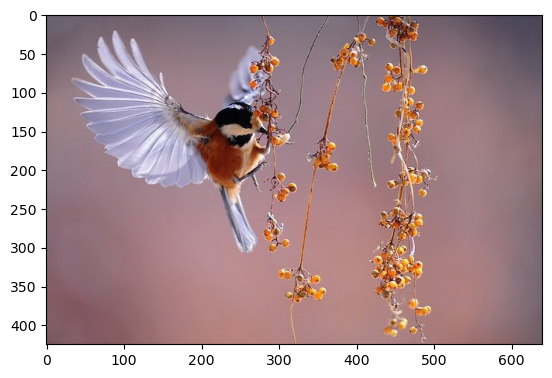

In [10]:
file_name = 'bird.png'
img = cv2.imread(file_name)

# plt.imshow(img) # 이렇게 하면 색깔이 이상하게 나오는 이유는
# opencv는 BGR(Blue, Green, Red) 형식으로 색을 표현하고 matplotlib는 RGB(Red, Green, Blue) 형식으로 색을 표현하기 때문이다.

# 왜? BGR이라는 이상한 색으로 표시를 했냐면 intel이 이 RGB라는 특허를 피하기 위해서 RGB를 BGR로 해놓았기 때문이다

# 그래서 Opencv에서 불러온 이미지를 matplotlib에서 보여줄때는 BGR을 RGB로 바꿔줘야한다.
# 그렇기에 img[:,:,::-1] 이라는 코드를 사용한다
# img[:,:,::-1]는 배열의 마지막 차원(채널 순서)을 역순으로 뒤집는다

plt.imshow(img[:,:,::-1])

# img[:,:,::-1] 이라는 코드말고 다른 방법으로는
# opencv를 사용하여 이미지를 읽어오는 방법이 아닌 matplotlib를 사용하여 이미지를 읽어오는 방법이 있다.
import matplotlib.pyplot as plt
import matplotlib.image as mpl

# mpl.imread() 함수를 사용하여 이미지를 읽어올 수 있다.
# img = mpl.imread(file_name)
# plt.imshow(img)
# plt.show()

### 문제 4.

영상 저장소에서 tree-1.jpg 와 tree-3.jpg 파일을 읽고 각각 아래 콘솔에 표시하라.

In [11]:
tree1 = mpl.imread('tree-1.jpg')
tree3 = mpl.imread('tree-3.jpg')

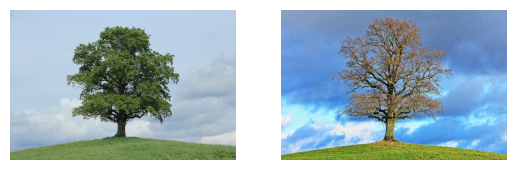

In [12]:
plt.subplot(121)
plt.imshow(tree1)
plt.axis('off')
plt.subplot(122)
plt.imshow(tree3)
plt.axis('off')
plt.show()

### 문제 5.

두 영상 $f_1(x,y)$와 $f_2(x,y)$에 각각 가중치 $\alpha$와 $1-\alpha$를 곱한 후에 더한 영상 $g(x,y)$는 다음과 같이 표현할 수 있다.

$$g(x,y) = \alpha f_1(x,y) + (1-\alpha )f_2(x,y), \;\; 0 \le \alpha \le 1$$

tree-1.jpg와 tree-3.jpg에 각각 0.5를 곱해서 더한 파일 파일을 아래 콘솔에 표시하라.

연산 결과 영상을 다시 uint8로 변환하여 화면에 표시하여야 한다.

In [13]:
# 그러니까 투명도를 기준으로 설정하여 a라는 값을 기준으로 0에서부터 1로 점차
# 나아가는 방식으로 첫 화면은 1-a라는 값을 가지고 있어서 보이다가 다음 화면인 a가 그
# 자리를 차지하는 형태

# tree = a * tree1 + (1-a) * tree3 이라는 식을 사용하여 투명도를 조절
# tree-1.jpg와 tree-3.jpg를 0.5의 투명도로 합성한 이미지
tree = 0.5 * tree1 + 0.5 * tree3

# 이미지가 uint8이므로 변환
tree = tree.astype('uint8')

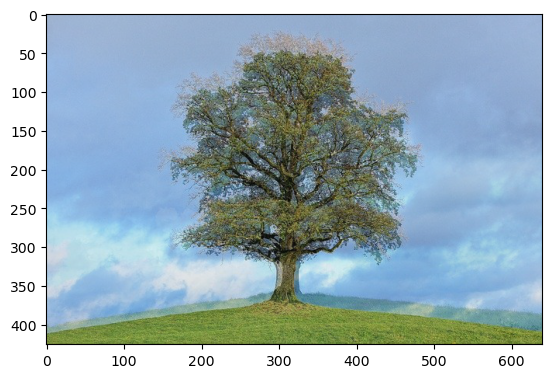

In [14]:
plt.imshow(tree)
plt.show()

## 문제 6.
OpenCV의 imread() 함수를 이용해서 tree-1.jpg와 tree-2.jpg 두 파일을 읽고, 
가중치 $\alpha$를 1부터 0까지 0.01 간격으로 변경해 가면서, 두 영상의 weighted sum을 구하고 화면에 표시하는 프로그램을 작성하라.
단, 영상과 영상 사이의 디스플레이 간격은 0.05초로 설정하라.


In [15]:
# 1. 두 이미지의 크기가 다를 경우 크기를 tree1에 맞춤
if tree1.shape != tree3.shape:
    tree3 = cv2.resize(tree3, (tree1.shape[1], tree1.shape[0]))

# 2. 윈도우 생성 (OpenCV로 이미지를 띄울 경우)
cv2.namedWindow("Blending", cv2.WINDOW_AUTOSIZE)

# 3. α 값을 1 → 0까지 점진적으로 감소시키며 두 이미지를 섞음
#    - np.arange(1.0, -0.01, -0.01) 사용 이유:
#      - 시작값: 1.0 (tree1이 완전히 보임)
#      - 끝값: -0.01 (실제 종료는 0에서 멈춤, -0.01은 포함되지 않음)
#      - 감소값: -0.01 (0.01씩 감소)
#      - np.arange()는 [start, stop) 형태이므로 -0.01을 사용하면 0까지 포함됨.
for a in np.arange(1.0, -0.01, -0.01):
    blended = cv2.addWeighted(tree1, a, tree3, 1 - a, 0)  # 가중치 합성 tree = a * tree1 + (1-a) * tree3 이라는 식을 사용하여 투명도를 조절
    blended_rgb = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)  # RGB 변환
    cv2.imshow("Blending", blended_rgb)  # 올바른 색상으로 표시
    cv2.waitKey(50)

# 4. 최종 이미지 표시 후 종료
cv2.waitKey(0)
cv2.destroyAllWindows()